### Fake News Classifier

In [116]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer, HashingVectorizer
import nltk

In [117]:
df=pd.read_csv('test.csv')
df1=pd.read_csv('submit.csv')

In [118]:
df.shape, df1.shape

((5200, 4), (5200, 2))

In [119]:
df['id'].count(), df1['id'].count()

(5200, 5200)

In [120]:
df['id'][:5], df1['id'][:5]

(0    20800
 1    20801
 2    20802
 3    20803
 4    20804
 Name: id, dtype: int64, 0    20800
 1    20801
 2    20802
 3    20803
 4    20804
 Name: id, dtype: int64)

In [121]:
df['label'] = df1['label']

In [122]:
df.head()

,id,title,author,text,label
0,20800,"Specter of Trump Loosens Tongues, if Not Purse...",David Streitfeld,"PALO ALTO, Calif. — After years of scorning...",0
1,20801,Russian warships ready to strike terrorists ne...,NaN,Russian warships ready to strike terrorists ne...,1
2,20802,#NoDAPL: Native American Leaders Vow to Stay A...,Common Dreams,Videos #NoDAPL: Native American Leaders Vow to...,0
3,20803,"Tim Tebow Will Attempt Another Comeback, This ...",Daniel Victor,"If at first you don’t succeed, try a different...",1
4,20804,Keiser Report: Meme Wars (E995),Truth Broadcast Network,42 mins ago 1 Views 0 Comments 0 Likes 'For th...,1


In [123]:
df.tail()

,id,title,author,text,label
5195,25995,The Bangladeshi Traffic Jam That Never Ends - ...,Jody Rosen,Of all the dysfunctions that plague the world’...,0
5196,25996,John Kasich Signs One Abortion Bill in Ohio bu...,Sheryl Gay Stolberg,WASHINGTON — Gov. John Kasich of Ohio on Tu...,1
5197,25997,"California Today: What, Exactly, Is in Your Su...",Mike McPhate,Good morning. (Want to get California Today by...,0
5198,25998,300 US Marines To Be Deployed To Russian Borde...,NaN,« Previous - Next » 300 US Marines To Be Deplo...,1
5199,25999,"Awkward Sex, Onscreen and Off - The New York T...",Teddy Wayne,Perhaps you’ve seen the new TV series whose pi...,0


In [124]:
X=df.drop('label',axis=1)

In [125]:
X.head()

,id,title,author,text
0,20800,"Specter of Trump Loosens Tongues, if Not Purse...",David Streitfeld,"PALO ALTO, Calif. — After years of scorning..."
1,20801,Russian warships ready to strike terrorists ne...,NaN,Russian warships ready to strike terrorists ne...
2,20802,#NoDAPL: Native American Leaders Vow to Stay A...,Common Dreams,Videos #NoDAPL: Native American Leaders Vow to...
3,20803,"Tim Tebow Will Attempt Another Comeback, This ...",Daniel Victor,"If at first you don’t succeed, try a different..."
4,20804,Keiser Report: Meme Wars (E995),Truth Broadcast Network,42 mins ago 1 Views 0 Comments 0 Likes 'For th...


In [126]:
y=df['label']

In [127]:
y.head()

0    0
1    1
2    0
3    1
4    1
Name: label, dtype: int64

In [128]:
df['title'].isnull().value_counts()

False    5078
True      122
Name: title, dtype: int64

In [129]:
df=df.dropna()

In [130]:
df['title'].isnull().value_counts()

False    4575
Name: title, dtype: int64

In [131]:
df['label'].value_counts()

1    2362
0    2213
Name: label, dtype: int64

In [132]:
df.shape

(4575, 5)

In [133]:
news=df.copy()

In [134]:
news.head()

,id,title,author,text,label
0,20800,"Specter of Trump Loosens Tongues, if Not Purse...",David Streitfeld,"PALO ALTO, Calif. — After years of scorning...",0
2,20802,#NoDAPL: Native American Leaders Vow to Stay A...,Common Dreams,Videos #NoDAPL: Native American Leaders Vow to...,0
3,20803,"Tim Tebow Will Attempt Another Comeback, This ...",Daniel Victor,"If at first you don’t succeed, try a different...",1
4,20804,Keiser Report: Meme Wars (E995),Truth Broadcast Network,42 mins ago 1 Views 0 Comments 0 Likes 'For th...,1
6,20806,Pelosi Calls for FBI Investigation to Find Out...,Pam Key,"Sunday on NBC’s “Meet the Press,” House Minori...",1


In [135]:
news.reset_index(inplace=True)

In [136]:
news.head()

,index,id,title,author,text,label
0,0,20800,"Specter of Trump Loosens Tongues, if Not Purse...",David Streitfeld,"PALO ALTO, Calif. — After years of scorning...",0
1,2,20802,#NoDAPL: Native American Leaders Vow to Stay A...,Common Dreams,Videos #NoDAPL: Native American Leaders Vow to...,0
2,3,20803,"Tim Tebow Will Attempt Another Comeback, This ...",Daniel Victor,"If at first you don’t succeed, try a different...",1
3,4,20804,Keiser Report: Meme Wars (E995),Truth Broadcast Network,42 mins ago 1 Views 0 Comments 0 Likes 'For th...,1
4,6,20806,Pelosi Calls for FBI Investigation to Find Out...,Pam Key,"Sunday on NBC’s “Meet the Press,” House Minori...",1


In [137]:
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
import re
ps = PorterStemmer()
corpus = []
for i in range(0, len(news)):
    review = re.sub('[^a-zA-Z]', ' ', news['text'][i])
    review = review.lower()
    review = review.split()
    review = [ps.stem(word) for word in review if not word in stopwords.words('english')]
    review = ' '.join(review)
    corpus.append(review)

In [138]:
corpus[3]

'min ago view comment like first time histori film panoram video station mean see everyth see eye say abl feel like real cosmonaut borisenko rt video present rt collabor russian space agenc roscosmo rocket space corpor energia project websit space rt com subscrib like leav repli login social id email address publish name'

In [139]:
# Creating the Bag of Words model by appying Countvectorizer
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(max_features=5000,ngram_range=(1,3))
X = cv.fit_transform(corpus).toarray()

In [140]:
X.shape

(4575, 5000)

In [141]:
y=news['label']

In [142]:
y.head()

0    0
1    0
2    1
3    1
4    1
Name: label, dtype: int64

In [143]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=0)

In [144]:
cv.get_feature_names()[:10]

['aaron',
 'abandon',
 'abba',
 'abc',
 'abc news',
 'abe',
 'abedin',
 'abil',
 'abl',
 'aboard']

In [145]:
cv.get_params()

{'analyzer': 'word',
 'binary': False,
 'decode_error': 'strict',
 'dtype': numpy.int64,
 'encoding': 'utf-8',
 'input': 'content',
 'lowercase': True,
 'max_df': 1.0,
 'max_features': 5000,
 'min_df': 1,
 'ngram_range': (1, 3),
 'preprocessor': None,
 'stop_words': None,
 'strip_accents': None,
 'token_pattern': '(?u)\\b\\w\\w+\\b',
 'tokenizer': None,
 'vocabulary': None}

In [146]:
count_df = pd.DataFrame(X_train, columns=cv.get_feature_names())

In [147]:
count_df.head()

,aaron,abandon,abba,abc,abc news,abe,abedin,abil,abl,aboard,abort,abroad,absenc,absolut,absorb,absurd,abu,abus,academ,academi,acceler,accept,access,access pipelin,accid,accident,accommod,accompani,accomplish,accord,accord report,account,accumul,accur,accus,achiev,acid,acknowledg,acquir,across,...,www infowarsstor,www infowarsstor com,xi,yahoo,yanke,yard,yate,ye,yeah,year,year ago,year later,year mr,year old,year said,year sinc,year year,yell,yellow,yemen,yesterday,yet,yet anoth,yiannopoulo,yield,york,york citi,york time,yorker,young,young peopl,younger,youth,youtub,zero,zika,zionist,zone,zu,zuckerberg
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,4,0,0
4,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,2,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [148]:
import matplotlib.pyplot as plt

In [149]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    See full source and example: 
    http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html
    
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

### MultinomialNB Algorithm

In [150]:

from sklearn.naive_bayes import MultinomialNB
classifier=MultinomialNB()

In [151]:
from sklearn import metrics
import numpy as np
import itertools

accuracy:   0.758
Confusion matrix, without normalization


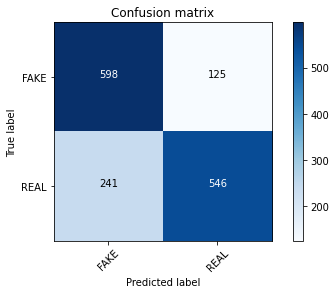

In [152]:
classifier.fit(X_train, y_train)
pred = classifier.predict(X_test)
score = metrics.accuracy_score(y_test, pred)
print("accuracy:   %0.3f" % score)
cm = metrics.confusion_matrix(y_test, pred)
plot_confusion_matrix(cm, classes=['FAKE', 'REAL'])

In [153]:
classifier.fit(X_train, y_train)
pred = classifier.predict(X_test)
score = metrics.accuracy_score(y_test, pred)
score

0.7576158940397351

In [154]:
y_train.shape

(3065,)

### Passive Aggressive Classifier Algorithm

In [155]:
from sklearn.linear_model import PassiveAggressiveClassifier
linear_clf = PassiveAggressiveClassifier(max_iter=50)

In [156]:
PassiveAggressiveClassifier?

accuracy:   0.877
Confusion matrix, without normalization


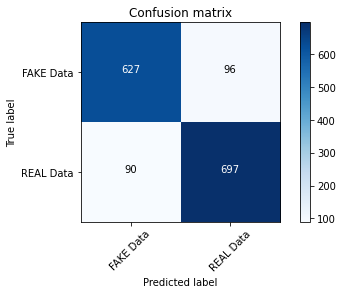

In [157]:
linear_clf.fit(X_train, y_train)
pred = linear_clf.predict(X_test)
score = metrics.accuracy_score(y_test, pred)
print("accuracy:   %0.3f" % score)
cm = metrics.confusion_matrix(y_test, pred)
plot_confusion_matrix(cm, classes=['FAKE Data', 'REAL Data'])

### Multinomial Classifier with Hyperparameter

In [158]:
classifier=MultinomialNB(alpha=0.1)

In [159]:
previous_score=0
for alpha in np.arange(0,1,0.1):
    sub_classifier=MultinomialNB(alpha=alpha)
    sub_classifier.fit(X_train,y_train)
    y_pred=sub_classifier.predict(X_test)
    score = metrics.accuracy_score(y_test, y_pred)
    if score>previous_score:
        classifier=sub_classifier
    print("Alpha: {}, Score : {}".format(alpha,score))

/usr/local/lib/python3.7/dist-packages/sklearn/naive_bayes.py:507: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  'setting alpha = %.1e' % _ALPHA_MIN)


Alpha: 0.0, Score : 0.7516556291390728
Alpha: 0.1, Score : 0.752317880794702
Alpha: 0.2, Score : 0.7543046357615895
Alpha: 0.30000000000000004, Score : 0.7549668874172185
Alpha: 0.4, Score : 0.7556291390728477
Alpha: 0.5, Score : 0.7556291390728477
Alpha: 0.6000000000000001, Score : 0.7562913907284768
Alpha: 0.7000000000000001, Score : 0.7582781456953642
Alpha: 0.8, Score : 0.7576158940397351
Alpha: 0.9, Score : 0.7576158940397351


In [160]:
feature_names = cv.get_feature_names()

In [161]:
classifier.coef_[0]

array([ -9.14192445,  -9.8738772 , -10.31971477, ...,  -9.33188758,
        -9.04316003,  -9.41927941])

In [162]:
### Most real
sorted(zip(classifier.coef_[0], feature_names), reverse=True)[:20]

[(-4.755624947331739, 'said'),
 (-4.75648668205696, 'trump'),
 (-5.384594367802295, 'state'),
 (-5.4249822534755605, 'presid'),
 (-5.42750878336931, 'clinton'),
 (-5.474996987462778, 'peopl'),
 (-5.481205983815839, 'would'),
 (-5.504611499099373, 'one'),
 (-5.508261471214315, 'report'),
 (-5.533253516142644, 'time'),
 (-5.638936929970568, 'year'),
 (-5.704594248760706, 'also'),
 (-5.7270949167694605, 'new'),
 (-5.732800089706561, 'news'),
 (-5.748949938923209, 'mr'),
 (-5.8088552590851155, 'like'),
 (-5.827549721760993, 'twitter'),
 (-5.827549721760993, 'say'),
 (-5.851742396440156, 'hillari'),
 (-5.885826178032716, 'elect')]

In [163]:
### Most fake
sorted(zip(classifier.coef_[0], feature_names))[:100]

[(-12.611126557997887, 'abe'),
 (-12.611126557997887, 'air forc retir'),
 (-12.611126557997887, 'architectur'),
 (-12.611126557997887, 'armi retir'),
 (-12.611126557997887, 'austin fitt'),
 (-12.611126557997887, 'aymara'),
 (-12.611126557997887, 'baylor'),
 (-12.611126557997887, 'brief post'),
 (-12.611126557997887, 'calori'),
 (-12.611126557997887, 'collect conscious'),
 (-12.611126557997887, 'corkin'),
 (-12.611126557997887, 'cranberri'),
 (-12.611126557997887, 'de fecha'),
 (-12.611126557997887, 'de fecha de'),
 (-12.611126557997887, 'de migracion'),
 (-12.611126557997887, 'delgaudio'),
 (-12.611126557997887, 'dhaka'),
 (-12.611126557997887, 'div'),
 (-12.611126557997887, 'erickson'),
 (-12.611126557997887, 'eurozon'),
 (-12.611126557997887, 'exxon'),
 (-12.611126557997887, 'fargo'),
 (-12.611126557997887, 'fecha'),
 (-12.611126557997887, 'fecha de'),
 (-12.611126557997887, 'fitt'),
 (-12.611126557997887, 'forc retir'),
 (-12.611126557997887, 'fortress'),
 (-12.611126557997887, 'gam

In [164]:
hs_vectorizer=HashingVectorizer(n_features=5000,binary=True)
X=hs_vectorizer.fit_transform(corpus).toarray()

In [165]:
HashingVectorizer?

In [166]:
## Divide the dataset into Train and Test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=0)

accuracy:   0.805
Confusion matrix, without normalization


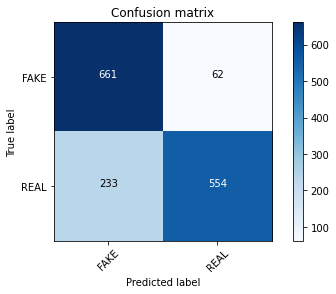

In [167]:
from sklearn.naive_bayes import MultinomialNB
classifier=MultinomialNB()
classifier.fit(X_train, y_train)
pred = classifier.predict(X_test)
score = metrics.accuracy_score(y_test, pred)
print("accuracy:   %0.3f" % score)
cm = metrics.confusion_matrix(y_test, pred)
plot_confusion_matrix(cm, classes=['FAKE', 'REAL'])